## Семинар 1 "Полносвязные нейронные сети"

ФИО: Коновалов Михаил Анатольевич

### Задания с семинара

1. Матричные производные
    - $\frac{\partial{}}{\partial{x}}x^TAx$
    
    $$d(x^TAx)=d(x^T)Ax+x^TAdx=x^TA^Tdx+x^TAdx$$
    $$\frac{\partial{}}{\partial{x}}x^TAx=x^TA^T+x^TA=x^T(A^T+A)$$
    
    - $\frac{\partial{}}{\partial{A}}x^TAx$
    
    $$\frac{\partial{}}{\partial{a_{mn}}}x^TAx=
    \frac{\partial{}}{\partial{a_{mn}}}\sum_{i,j}{x_ix_ja_{ij}}=x_mx_n$$
    $$\frac{\partial{}}{\partial{A}}x^TAx=xx^T$$
    
    - $\frac{\partial{}}{\partial{x}}||Ax+b||^2$
    $$d(||Ax+b||^2)=d((Ax+b)^T(Ax+b))=(Adx)^T(Ax+b)+(Ax+b)^TAdx=2(Adx)^T(Ax+b)$$
    $$\frac{\partial{}}{\partial{x}}||Ax+b||^2=2A^T(Ax+b)$$
    
    - $\frac{\partial{}}{\partial{A}}tr(AB)$
    $$\frac{\partial{}}{\partial{a_{mn}}}\sum_{i, j}{a_{ij}b_{ji}}=b_{nm}$$
    $$\frac{\partial{}}{\partial{A}}tr(AB)=B^T$$
    
    
2. Линейная регрессия
    - Функционал: $L||Xw-y||^2$
    - Оптимальные значения весов:
    $$\frac{\partial{}}{\partial{w}}L=2X^T(Xw-y)=2X^TXw-X^Ty=0$$
    $$X^TXw=X^Ty$$
    $$w=(X^TX)^{-1}X^Ty$$


3. Дифференцирование NLL
    - Softmax + NLL:
    $$NLL(Softmax(y), t)=-\sum_c{[t=c]log(\frac{e^{y_c}}{\sum_i{e^{y_i}}})}$$
    - $\frac{\partial{}}{\partial{y_j}}NLL(Softmax(y), t)$: S – Softmax, sum – $\sum_i{e^{y_i}}$
    $$\frac{\partial{}}{\partial{y_j}}NLL(Softmax(y), t)=-\sum_c{[t=c]\frac{1}{S(y_c)}\frac{\partial{S(y_c)}}{\partial{y_j}}}$$
    $$\frac{\partial{S(y_c)}}{\partial{y_j}}=\frac{\partial{}}{\partial{y_j}}\frac{e^{y_c}}{sum}$$
        1) j = c:
        $$\frac{\partial{S(y_c)}}{\partial{y_j}}=\frac{sume^{y_c}-e^{y_j}e^{y_c}}{sum^2}=\frac{e^{y_c}}{sum}\frac{sum-e^{y_j}}{sum}=S(y_c)(1-S(y_j))$$
        2) j != c:
        $$\frac{\partial{S(y_c)}}{\partial{y_j}}=-\frac{e^{y_j}e^{y_c}}{sum^2}=S(y_c)S(y_j)$$
    $$\frac{\partial{S(y_c)}}{\partial{y_j}}=S(y_c)([j=c]-S(y_j))$$
    $$\frac{\partial{}}{\partial{y_j}}NLL(Softmax(y), t)=-\sum_c{[t=c]\frac{1}{S(y_c)}([j=c]-S(y_i)}=-\sum_c{[t=c]([j=c]-S(y_j))}=S(y_j)-[j=t]$$
    $$\frac{\partial{}}{\partial{y}}NLL(Softmax(y), t)=(S(y_1)-[t=1], ..., S(y_K)-[t=K])$$
    Отметим, что в среди компонент данного вектора отрицательной является только компонента, относящаяся к правильной метке класса ($S(y_t)-[t=t], S(y_t)<[t=t]=1$), а все остальные компоненты положительные ($0 < S(y_i) < 1, y\ne t$). Это означает, что увеличение выхода Softmax, соответствующего правильной метке, и уменьшение всех остальных выходов (то есть увеличение уверенности ответа при правильной классификации) приводит к минимизации лосс-функции. Кроме того, на неправильно классифицированных объектах норма градиента больше, чем на правильно классифицированных, что можно интерпретировать как штраф за неправильную классификацию (увеличение $S(y_t)$ приводит к уменьшению модуля $S(y_t)-1$ и нормы градиента, см. ячейку ниже).
      
      
4. Логистическая регрессия
    - $p(y|x)=\sigma(yw^Tx)$
    - $L(w)=\prod_i{\sigma(y_iw^Tx_i)}$
    - $\frac{\partial}{\partial{w}}log(L)=\frac{y_ix_i}{1+e^{y_iw^Tx_i}}$
    - Правильно классифицированный объект: $y_iw^Tx_i > 0; e^{y_iw^Tx_i} > 1; \sigma(-y_iw^Tx_i) < 0.5$ - низкие значения градиента
    - Неправильно классифицированный объект: $y_iw^Tx_i < 0; e^{y_iw^Tx_i} < 1; \sigma(-y_iw^Tx_i) > 0.5$ - высокие значения градиента
    
    Градиент на неправильно классифицированных объектах больше - сильнее штраф за неправильную классификацию.

In [17]:
res = np.array([0.1, 0.4, 0.2, 0.1, 0.2])
grad = np.array([0.1, res[1] - 1, 0.2, 0.1, 0.2])
print("Правильная классификация:", np.sum(grad ** 2))

res = np.array([0.1, 0.2, 0.4, 0.1, 0.2])
grad = res.copy()
grad[1] -= 1
print("Неправильная классификация:", np.sum(grad ** 2))

Правильная классификация: 0.4600000000000001
Неправильная классификация: 0.8600000000000002


В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src="backprop.pdf" width="400" />

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

Важным требованием к реализации является векторизация всех слоев: все операции должны быть сведены к матричным, не должно быть циклов. Это значительно уменьшает временные затраты.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Часть 1: Линейный слой


Приведем пример вычисления градиентов для линейного слоя: $y = Wx$, $x \in \mathbb{R}^{K \times n}$, $y \in \mathbb{R}^{K \times n}$, $W \in \mathbb{R}^{n \times m}$, где $K$ — число объектов.

Рассмотрим $L$ как функцию от выходов нейронной сети: $L = L(y_{11}, y_{12}, \dots)$

$$y_{kt} = (Wx)_{kt} = \sum_{z=1}^{n} x_{kz}W_{zt}$$

$$\frac{\partial L}{\partial x_{ij}} = \sum_{kt} \frac{\partial L}{\partial y_{kt}}\frac{\partial y_{kt}}{\partial x_{ij}} = \sum_{kt} \frac{\partial L}{\partial y_{kt}}\frac{\partial \sum_z x_{kz}w_{zt}}{\partial x_{ij}}= \sum_{t} \frac{\partial L}{\partial y_{it}}\frac{\partial w_{jt}}{\partial x_{ij}}$$

$$\frac{\partial{L}}{\partial x} = \frac{\partial{L}}{\partial y}W^T$$

In [1324]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        self.W = np.random.randn(input_size, output_size) * 0.1
        self.b = np.zeros(output_size)
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        self.X = X
        self.Y = X @ self.W + self.b
        return self.Y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        self.dLdW = self.X.T.dot(dLdy)
        self.dLdb = np.sum(dLdy, axis=0) 
        # можно объяснить суммирование, если записать bias как еще один вес, соответствующий фиктивному признаку
        self.dLdX = dLdy.dot(self.W.T)
        return self.dLdX
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        self.W -= learning_rate * self.dLdW
        self.b -= learning_rate * self.dLdb

### Часть 2: Численный градиент

Релизуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

In [1325]:
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    eps = 10**(-5)
    
    f_grad = np.zeros(gradient.shape)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i, j] += eps            
            f_r = func(X)
            X[i, j] -= 2*eps            
            f_l = func(X)            
            X[i, j] += eps
            f_grad[i, j] = (f_r - f_l) / 2 / eps

    return np.max(np.abs(gradient - f_grad))

In [1326]:
np.random.seed(777)
x = np.random.rand(10, 20)
func = lambda x: (x**2).sum()
gradient = 2*x
check_gradient(func, x, gradient)

5.662181834509283e-10

In [1327]:
X_check = np.random.rand(2, 3)
Y_check = np.array([[0], [1]])

Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

$\frac{\partial{L}}{\partial{w}}$ calculation

In [1332]:
l = Linear(3, 2)

def loss(W):
    l.W = W
    res = l.forward(X_check)
    return np.sum((res - Y_check)**2)

res = l.forward(X_check)
dLdy = 2*(res - Y_check)
l.backward(dLdy)

assert(check_gradient(loss, l.W, l.dLdW) < 1e-8)

$\frac{\partial{L}}{\partial{X}}$ calculation

In [1334]:
l = Linear(3, 2)

def loss(X):
    res = l.forward(X)
    return np.sum((res - Y_check) ** 2)

res = l.forward(X_check)
dLdy = 2 * (res - Y_check)
l.backward(dLdy)

assert(check_gradient(loss, l.X, l.dLdX) < 1e-8)

### Часть 3: Сигмоида

In [1119]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        self.Y = 1 / (1 + np.exp(-X))
        return self.Y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        self.dLdX = self.Y * (1 - self.Y) * dLdy
        return self.dLdX
    
    def step(self, learning_rate):
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [1337]:
s = Sigmoid()

def loss(X):
    res = s.forward(X)
    return np.sum((res - Y_check) ** 2)

res = s.forward(X_check)
dLdy = 2 * (res - Y_check)
s.backward(dLdy)

assert(check_gradient(loss, s.X, s.dLdX) < 1e-8)

### Часть 4: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://blog.feedly.com/tricks-of-the-trade-logsumexp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [1413]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        pass
    
    def __softmax(self, X):
        return np.exp(X) / (np.sum(np.exp(X), axis=1)).reshape(X.shape[0], 1)
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        self.X = X
        self.y = y
#         self.softmax = self.__softmax(X)
#         self.nll = (-np.log(np.choose(y, self.softmax.T))).mean()
        self.nll = (np.log(np.sum(np.exp(X), axis=1)) - np.choose(y, X.T)).mean()
        return self.nll
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        self.dLdX = self.__softmax(self.X)
        self.dLdX[np.arange(self.dLdX.shape[0]), self.y] -= 1
        self.dLdX /= self.dLdX.shape[0]
        return self.dLdX 

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [1415]:
X_check = np.random.rand(2, 3)
Y_check = np.array([1, 0])
nll = NLLLoss()

def loss(X):
    return nll.forward(X, Y_check)

nll.forward(X_check, Y_check)
nll.backward()

assert(check_gradient(loss, nll.X, nll.dLdX) < 1e-8)

### Часть 5, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [1345]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        self.modules = modules
    
    def forward(self, X):
        self.predict = X
        for module in self.modules:
            self.predict = module.forward(self.predict)
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        self.gradient = dLdy
        for module in self.modules[::-1]:
            self.gradient = module.backward(self.gradient)
    
    def step(self, learning_rate):
        """
        Update weights in each module
        """
        for module in self.modules:
            module.step(learning_rate)

### Часть 6, обучение на простых данных

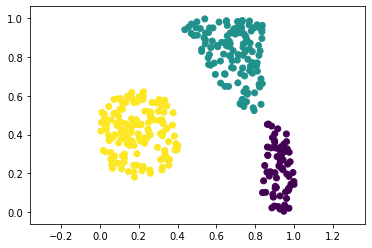

In [1372]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.005). 
2. Нарисуйте график сходимости (величина NLL после каждого обновления).
3. Нарисуйте разделяющую поверхность
4. Попробуйте подобрать темп обучения. Как меняется сходимость?

1. Напишем фукнции для сборки и обучения сети, а также для отрисовки learning curve и разделяющей поверхности.

In [1360]:
def train_nn_nll(learning_rate=5e-3, verbose=None):
    """
    Create and train a neural network with *learning_rate* and NLLLoss
    """
    modules = [
        Linear(2, 10),
        Sigmoid(),
        Linear(10, 10),
        Sigmoid(),
        Linear(10, 3)
    ]

    n_epochs = 1000

    nn = NeuralNetwork(modules)
    loss = NLLLoss()
    loss_values = []

    for epoch in range(n_epochs):
        nn.forward(X)
        loss_value = loss.forward(nn.predict, y)
        loss_values.append(loss_value)
        
        if verbose and epoch % verbose == 0:
            print(f"Epoch: {epoch}    Loss: {loss_value}")

        gradient = loss.backward()
        nn.backward(gradient)
        nn.step(learning_rate)
        
    return nn, loss_values

In [1352]:
def learning_curve(loss_values, learning_rate=5e-3):
    plt.plot(loss_values)
    plt.title(f"Learning curve, lr={learning_rate}")
    plt.xlabel("epochs")
    plt.ylabel("NLL")

In [1353]:
def plot_surface(nn):
    
    Xx_min, Xx_max = np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5
    Xy_min, Xy_max = np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5

    step = 1e-3
    Xx, Xy = np.meshgrid(np.arange(Xx_min, Xx_max, step), np.arange(Xy_min, Xy_max, step))
    points = np.c_[Xx.flatten(), Xy.flatten()]
    
    nn.forward(points)
    predict = np.argmax(nn.predict, axis=1).reshape(Xx.shape)
    
    plt.figure(figsize=(5, 5))
    plt.pcolormesh(Xx, Xy, predict, alpha=0.01, cmap="plasma")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1, cmap="plasma")

2. Посмотрим на сходимость модели при `learning_rate` равном 0.005 и на разделяющую поверхность.

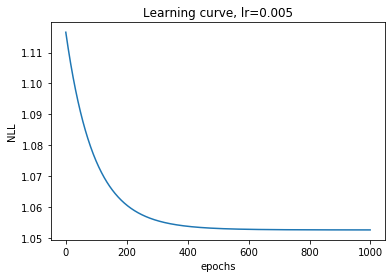

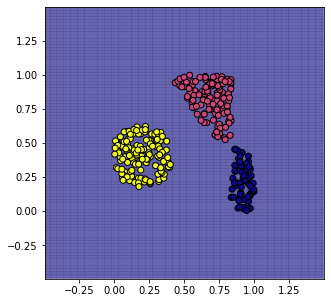

In [1355]:
nn, loss_values = train_nn_nll()
learning_curve(loss_values)
plot_surface(nn)

3. Модель к чему-то сошлась, но  разделяющей поверхности нет. Попробуем увеличивать `learning_rate` и смотреть на сходимость и поверхность.

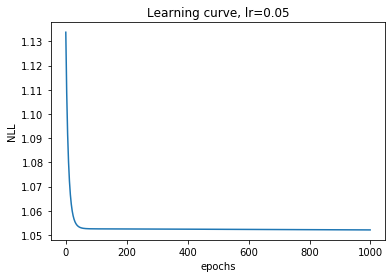

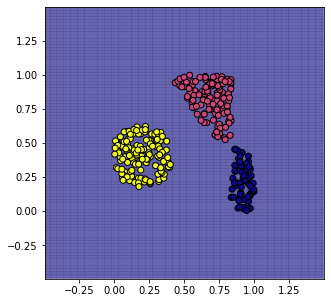

In [1356]:
lr = 5e-2
nn, loss_values = train_nn_nll(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

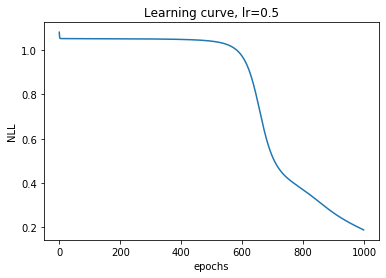

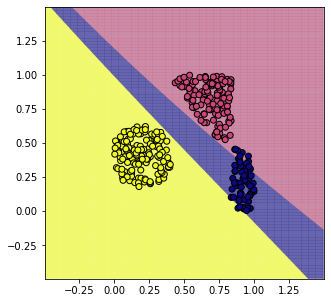

In [1357]:
lr = 5e-1
nn, loss_values = train_nn_nll(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

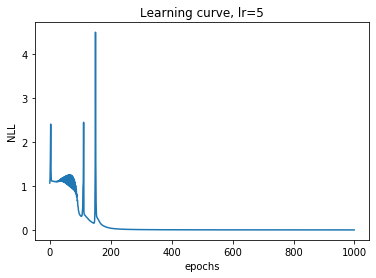

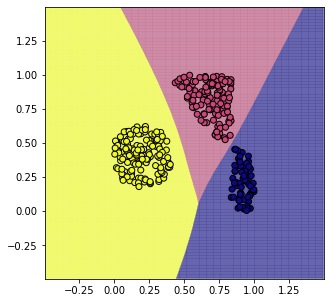

In [1363]:
lr = 5
nn, loss_values = train_nn_nll(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

<img src="https://memepedia.ru/wp-content/uploads/2019/06/bel.jpg" width="400" />

При достаточно большом `learning_rate` модель сошлась к более глубокому минимуму и мы получили приятную на вид разделяющую поверхность.

Отличная визуализация: http://playground.tensorflow.org/

## Домашнее задание:

* Подоберите темп обучения. Как меняется сходимость? Нарисуйте график оптимального значения функции потерь для различных значений learning_rate
* Решите поставленную выше задачу как задачу регрессии с MSE. Изменилась ли разделяющая поверхность?

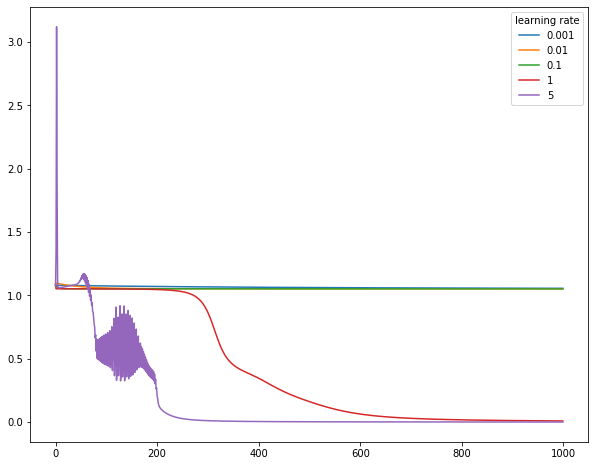

In [1113]:
loss_list = []
lrs = [1e-3, 1e-2, 1e-1, 1, 5]
for lr in lrs:
    loss_list.append(train_nn(lr, verbose=False)[1])

loss_list = np.array(loss_list)
plt.figure(figsize=(10, 8))
plt.plot(loss_list.T)
plt.legend(lrs, title="learning rate")

Судя по графикам, можно было взять и 1. Сходится примерно к тому же NLL, что и при 5, но делает это стабильнее.

Создаем класс для MSE. Для решения этой задачи с помощью регрессии будем предсказывать трехкомпонентный вектор, в котором наибольшая координата соответствует метке предсказанного класса.

In [1249]:
class MSE:

    def forward(self, X, y):
        self.X = X
        self.y = y
        return np.mean(np.sum((self.X - self.y) ** 2, axis=1))
    
    def backward(self):
        return 2 * (self.X - self.y) / self.y.shape[0]

In [1367]:
X_check = np.random.rand(2, 3)
y_check = np.array([[1, 0, 0], [0, 1, 0]])
mse = MSE()

def loss(X):
    return mse.forward(X, y_check)

res = mse.forward(X_check, y_check)
grad = mse.backward()
assert(check_gradient(loss, X_check, grad) < 1e-8)

Приводим таргет к виду трехкомпонентного вектора.

In [1373]:
target = np.zeros((y.shape[0], 3))
target[np.arange(target.shape[0]), y] = 1

In [1374]:
def train_nn_mse(learning_rate, verbose=None):
    """
    Create and train a neural network with *learning_rate* and MSELoss
    """
    modules = [
        Linear(2, 10),
        Sigmoid(),
        Linear(10, 10),
        Sigmoid(),
        Linear(10, 3)
    ]

    n_epochs = 1000

    nn = NeuralNetwork(modules)
    loss = MSE()
    loss_values = []

    for epoch in range(n_epochs):
        nn.forward(X)
        loss_value = loss.forward(nn.predict, target)
        loss_values.append(loss_value)
        if verbose and epoch % verbose == 0:
            print(f"Epoch: {epoch}    Loss: {loss_value}")

        gradient = loss.backward()
        nn.backward(gradient)
        nn.step(learning_rate)

    return nn, loss_values

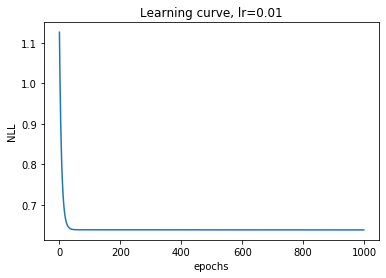

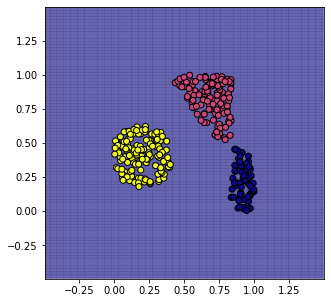

In [1375]:
lr = 0.01
nn, loss_values = train_nn_mse(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

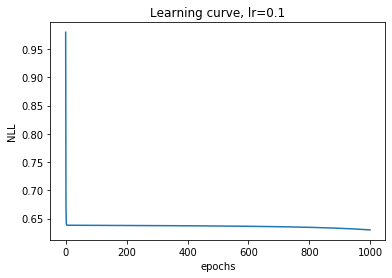

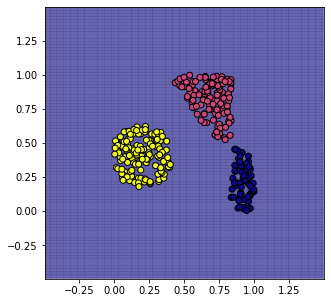

In [1376]:
lr = 0.1
nn, loss_values = train_nn_mse(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

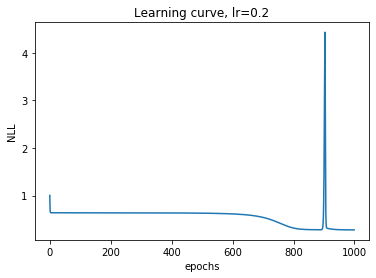

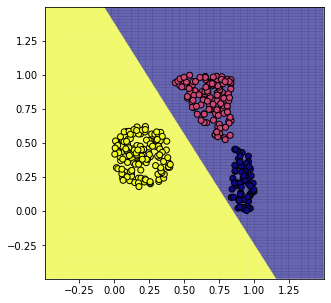

In [1382]:
lr = 0.2
nn, loss_values = train_nn_mse(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

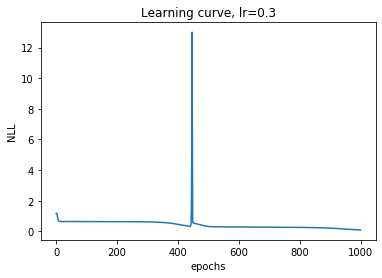

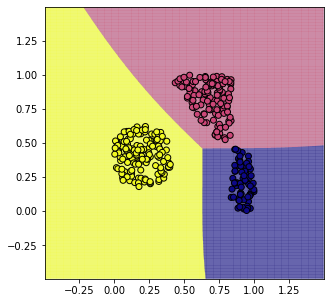

In [1379]:
lr = 0.3
nn, loss_values = train_nn_mse(lr)
learning_curve(loss_values, lr)
plot_surface(nn)

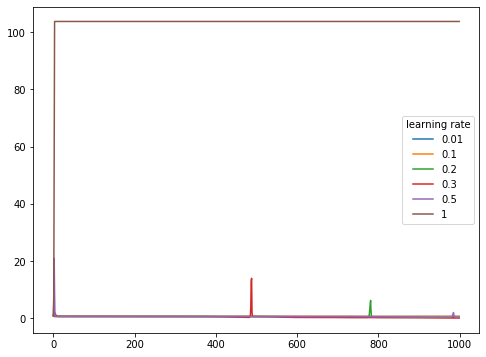

In [1416]:
loss_list = []
lrs = [0.01, 0.1, 0.2, 0.3, 0.5, 1]
for lr in lrs:
    loss_list.append(train_nn_mse(lr)[1])

loss_list = np.array(loss_list)
plt.figure(figsize=(8, 6))
plt.plot(loss_list.T)
plt.legend(lrs, title="learning rate");

В результате подбора величины `learning_rate` удалось добиться построения разделяющей поверхности. Она делит объекты несколько хуже, причем данная модель менее устойчива (от запуска к запуску значение лосса и вид поверхности может значительно меняться). На кривых обучения можно видеть, что при увеличении `learinig_rate` до 1 модель перестает сходиться. В целом можно сделать вывод, что классификация с помощью нейронной сети с NLLLoss работает лучше, чем с MSELoss.